In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')
import re

In [3]:
%load_ext autoreload
%autoreload 2
import preprocessing as pr

In [4]:
df21=pd.read_excel('data2.xlsx', sheet_name='2021',index_col=0)

In [5]:
df20=pd.read_excel('data2.xlsx', sheet_name='2020',index_col=0)

In [6]:
df17=pd.read_excel('data2.xlsx', sheet_name='2017',index_col=0)

In [7]:
df=pd.concat([df21,df20,df17], ignore_index=True)

In [126]:
df.shape

(5314, 20)

In [8]:
df=pr.preprocess(df)

In [9]:
df.columns

Index(['Capacity\n(KVA)', 'Make', 'Faulty_Transformer_Date', 'REGION',
       'CLUSTER', 'Max._Allowable_Loading_Per_Phase',
       'Transformer_Repaired_By_TSW', 'REMARKS',
       'Transformer_being_removed_on', 'Oil_%', 'TTR_Status',
       'Tap_changer_status', 'Oil_status', 'Silica_Gel_Status',
       'Conservator_Tank_Valve', 'Top_Status', 'Work_Details_Carried_Out',
       'Final_Conclusion', 'Observations', 'Avg_loading_per_phase'],
      dtype='object')

In [28]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
Average_laoding_greater_than_max_flag,5314,1.000000
Issuance_Date,4844,0.911554
FDF_ID.,1864,0.350772
Date_of_Transformer_Approved,1444,0.271735
Fault_Location,329,0.061912
Date_of_Transformer_Receipt,64,0.012044
Max._oil_level_(Ltr.),0,0.000000
Oil_Quantity,0,0.000000
Oil_%,0,0.000000
TTR_Status,0,0.000000


Text(0.5, 1.0, 'Transformers faults categorized from 2017-2021')

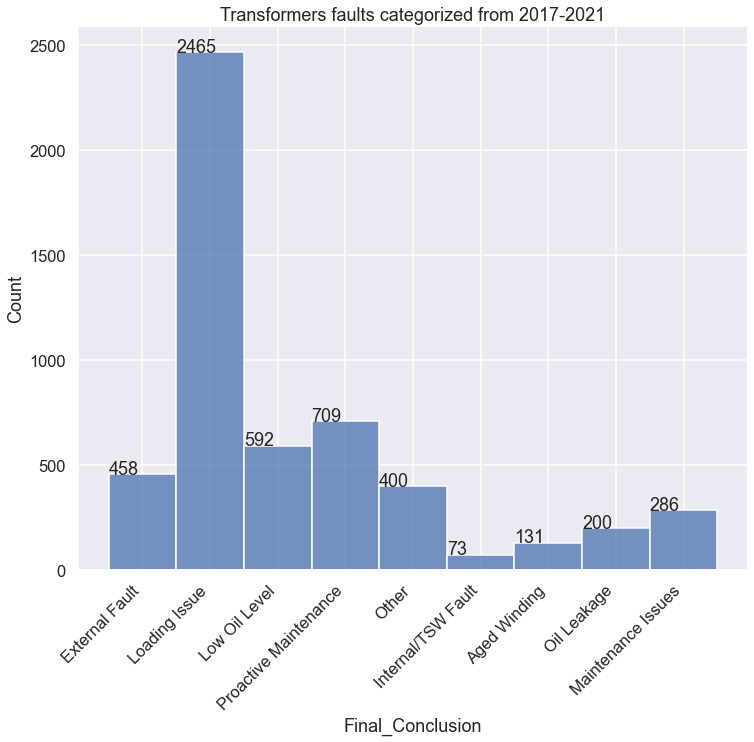

In [31]:
plt.figure(figsize=(12, 10))
ax=sns.histplot(df.Final_Conclusion,)
plt.xticks(rotation=45,ha='right')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1))
plt.title('Transformers faults categorized from 2017-2021')

<AxesSubplot:>

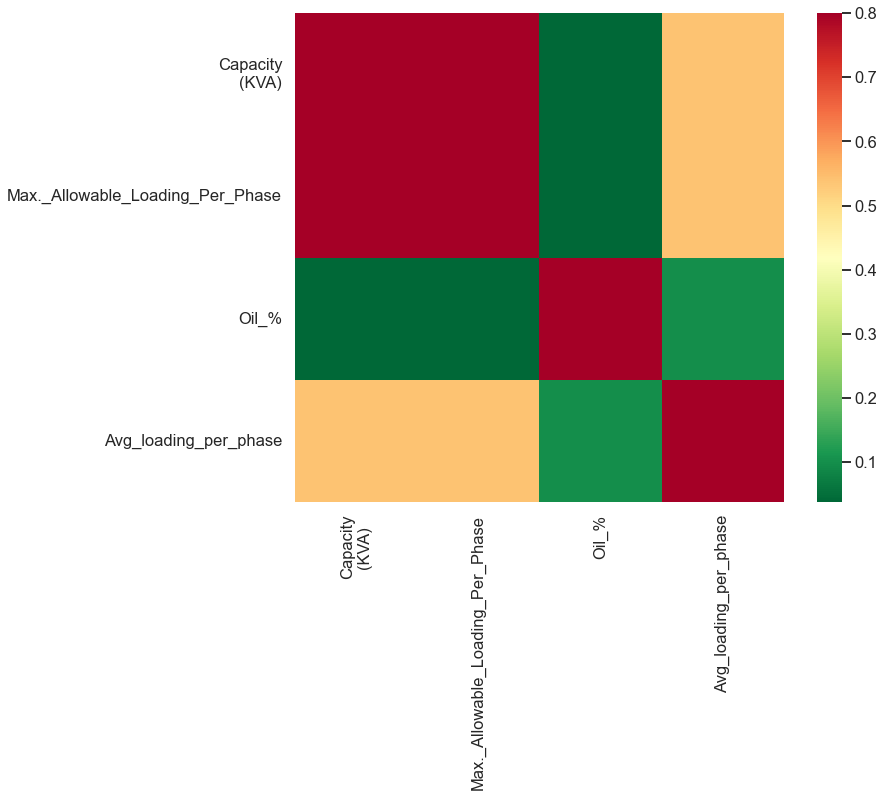

In [32]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")


In [92]:
df.head()

,Capacity\n(KVA),Make,Faulty_Transformer_Date,REGION,CLUSTER,Max._Allowable_Loading_Per_Phase,Transformer_Repaired_By_TSW,REMARKS,Transformer_being_removed_on,Oil_%,TTR_Status,Tap_changer_status,Oil_status,Silica_Gel_Status,Conservator_Tank_Valve,Top_Status,Work_Details_Carried_Out,Observations,Avg_loading_per_phase
0,50,SIEMENS,12,R4,CN,69.444444,NO,MISSING/UNINTELLIGIBLE,MISSING/UNINTELLIGIBLE,0.640000,OK,A,C,Not Available,Not Available,C,Minor Repair,Low oil level,204.719945
1,100,P/POWER,08,R3,CJ,138.888889,YES,LINK BLOWN OUT,FAULT,0.852381,"R,FAULTY",A,C,Not Available,Not Available,B,"RYB, HT & LT CHANGED",FDF NA (Fault cannot be determined),131.000000
2,250,J&P,12,R2,CS,347.222222,NO,OIL LEAKAGE,PROACTIVE MAINTENANCE,0.602353,"3,FAULTY",A,C,D,A,B,"RYB, HT & LT CHANGED",FDF NA (Fault cannot be determined),270.666667
3,250,CLIMAX,10,R2,CS,347.222222,NO,OIL LEAKAGE,PROACTIVE MAINTENANCE,0.602353,"3,FAULTY",A,C,D,A,B,"RYB, HT & LT CHANGED",FDF NA (Fault cannot be determined),117.666667
4,500,CLIMAX,12,R1,CO,694.444444,NO,OIL LEAKAGE,FAULT,0.347222,OK,A,C,D,A,B,"RYB, HT & LT CHANGED",FDF NA (Fault cannot be determined),171.105263


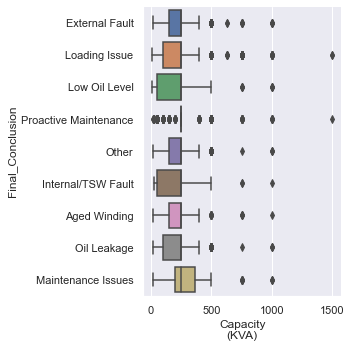

In [111]:
#sns.set(rc={'figure.figsize':(1000,8.27)})
sns.catplot(x="Capacity\n(KVA)", y="Final_Conclusion", kind="box", data=df)

In [105]:
df_R=df.groupby('REGION')['Final_Conclusion'].count()

In [108]:
df_R

REGION
R1    1564
R2     636
R3    1990
R4    1124
Name: Final_Conclusion, dtype: int64

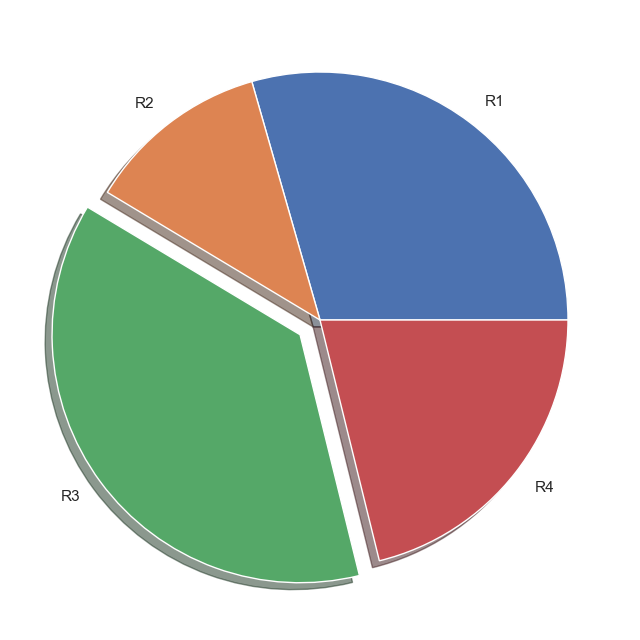

In [116]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([29.43,11.96,37.45,21.15])
mylabels = ["R1", "R2", "R3", "R4"]
myexplode = [0, 0, 0.1, 0]

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
plt.pie(y1, labels = mylabels, explode = myexplode, shadow = True)
plt.show() 

In [121]:
df_o=df[(df['Final_Conclusion']=='Low Oil Level') |(df['Final_Conclusion']=='Loading Issue')]

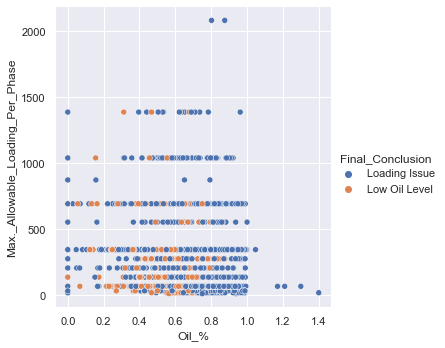

In [125]:
sns.relplot(data=df_o, x="Oil_%", y="Max._Allowable_Loading_Per_Phase", hue="Final_Conclusion")

In [19]:
################################################

X_train, X_test, y_train, y_test = pr.get_train_test(df)

In [20]:
from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import train_test_split

In [21]:
num_feats = pr.get_num_feats(df)

In [22]:
cat_feats=pr.get_cat_feats(df)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [24]:
numeric_transform = Pipeline([('scaling', StandardScaler()),])

categorical_transform = Pipeline([('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing_df = ColumnTransformer([('numeric', numeric_transform, num_feats), 
                                    ('categorical', categorical_transform, cat_feats)])

In [49]:
dummy = DummyClassifier(strategy='most_frequent')

pipeline = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA()),
                     ('model',dummy)])

param_grid = {'model__random_state': [5,10,20],
              #'pca__n_components':[5,10,13],
              }

grid_dummy = GridSearchCV(pipeline,param_grid=param_grid, cv=5)
grid_dummy.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Capacity\n'
                                                                          '(KVA)',
                                                                          'Max._Allowable_Loading_Per_Phase',
                                                                          'Oil_%',
                                                                          'Tap_changer_status',
                                                                          'Oil_status',
                                                                          'Silica

In [46]:
LR = LogisticRegression()

pipeline = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA()),
                     ('model',LR)])

param_grid = {'model__C': [1,10,100],
              #'pca__n_components':[5,10,13],
              }

grid_LR = GridSearchCV(pipeline,param_grid=param_grid, cv=5)
grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Capacity\n'
                                                                          '(KVA)',
                                                                          'Max._Allowable_Loading_Per_Phase',
                                                                          'Oil_%',
                                                                          'Tap_changer_status',
                                                                          'Oil_status',
                                                                          'Silica

In [47]:
RF = RandomForestClassifier()

pipeline = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA()),
                     ('model',RF)])

param_grid = {'model__max_depth':[6,10,13],
              #'pca__n_components':[5,10,13],
              }

grid_RF = GridSearchCV(pipeline,param_grid=param_grid, cv=5)
grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Capacity\n'
                                                                          '(KVA)',
                                                                          'Max._Allowable_Loading_Per_Phase',
                                                                          'Oil_%',
                                                                          'Tap_changer_status',
                                                                          'Oil_status',
                                                                          'Silica

In [50]:
svc = SVC()

pipeline = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA()),
                     ('model',svc)])

param_grid = {'model__random_state': [5,10,20],
              #'pca__n_components':[5,10,13],
              }

grid_svc = GridSearchCV(pipeline,param_grid=param_grid, cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Capacity\n'
                                                                          '(KVA)',
                                                                          'Max._Allowable_Loading_Per_Phase',
                                                                          'Oil_%',
                                                                          'Tap_changer_status',
                                                                          'Oil_status',
                                                                          'Silica

In [52]:
xgb = xgb.XGBClassifier()



[23:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:49:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Capacity\n'
                                                                          '(KVA)',
                                                                          'Max._Allowable_Loading_Per_Phase',
                                                                          'Oil_%',
                                                                          'Tap_changer_status',
                                                                          'Oil_status',
                                                                          'Silica

In [53]:
grid_xgb.cv_results_

{'mean_fit_time': array([ 9.9879508 , 20.16092687, 11.78930459, 18.64686003, 12.78610139,
        19.46346664]),
 'std_fit_time': array([0.90309788, 2.68297139, 0.99780428, 0.70794822, 1.7148963 ,
        1.02768703]),
 'mean_score_time': array([0.05456839, 0.07861681, 0.0658061 , 0.06196389, 0.06056204,
        0.08857551]),
 'std_score_time': array([0.01558436, 0.01315775, 0.01635969, 0.00487561, 0.0181688 ,
        0.0133074 ]),
 'param_model__max_depth': masked_array(data=[10, 10, 12, 12, 15, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__n_estimators': masked_array(data=[50, 100, 50, 100, 50, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__max_depth': 10, 'model__n_estimators': 50},
  {'model__max_depth': 10, 'model__n_estimators': 100},
  {'model__max_depth': 12, 'model__n_estimators': 50},
  {'model_

In [54]:
df_dummy=pd.DataFrame(grid_dummy.cv_results_)

In [55]:
df_knn=pd.DataFrame(grid_knn.cv_results_)

In [56]:
df_lr=pd.DataFrame(grid_LR.cv_results_)

In [57]:
df_rf=pd.DataFrame(grid_RF.cv_results_)

In [58]:
df_svc=pd.DataFrame(grid_svc.cv_results_)

In [59]:
df_xgb=pd.DataFrame(grid_xgb.cv_results_)

In [62]:
df_dummy['CLF']='Most Frequent Classifier'
df_knn['CLF']='k Nearest Neighbors'
df_lr['CLF']='Logistic Regression'
df_rf['CLF']='Random Forest'
df_svc['CLF']='Support Vector Classifier'
df_xgb['CLF']='XGBoost'

In [63]:
df_res=pd.concat([df_dummy,df_knn,df_lr,df_rf,df_svc,df_xgb])

In [64]:
df_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,CLF,param_model__n_neighbors,param_model__C,param_model__max_depth,param_model__n_estimators
0,0.063154,0.021842,0.026193,0.008548,5,{'model__random_state': 5},0.461810,0.462353,0.462353,0.462353,0.461176,0.462009,0.000466,1,Most Frequent Classifier,NaN,NaN,NaN,NaN
1,0.063254,0.009851,0.023296,0.004689,10,{'model__random_state': 10},0.461810,0.462353,0.462353,0.462353,0.461176,0.462009,0.000466,1,Most Frequent Classifier,NaN,NaN,NaN,NaN
2,0.129624,0.017591,0.048741,0.011834,20,{'model__random_state': 20},0.461810,0.462353,0.462353,0.462353,0.461176,0.462009,0.000466,1,Most Frequent Classifier,NaN,NaN,NaN,NaN
0,0.052836,0.003540,0.276754,0.060013,NaN,{'model__n_neighbors': 5},0.654524,0.658824,0.617647,0.618824,0.609412,0.631846,0.020575,3,k Nearest Neighbors,5,NaN,NaN,NaN
1,0.048126,0.000369,0.241106,0.007595,NaN,{'model__n_neighbors': 10},0.672150,0.660000,0.645882,0.628235,0.624706,0.646195,0.018159,1,k Nearest Neighbors,10,NaN,NaN,NaN
2,0.047917,0.001991,0.246598,0.004606,NaN,{'model__n_neighbors': 20},0.662750,0.647059,0.636471,0.621176,0.632941,0.640079,0.014028,2,k Nearest Neighbors,20,NaN,NaN,NaN
0,0.803219,0.088576,0.023217,0.003530,NaN,{'model__C': 1},0.709753,0.694118,0.716471,0.692941,0.694118,0.701480,0.009741,1,Logistic Regression,NaN,1,NaN,NaN
1,0.787313,0.031025,0.025357,0.005922,NaN,{'model__C': 10},0.703878,0.695294,0.710588,0.682353,0.682353,0.694893,0.011329,2,Logistic Regression,NaN,10,NaN,NaN
2,0.836891,0.083314,0.024665,0.001130,NaN,{'model__C': 100},0.705053,0.691765,0.708235,0.682353,0.678824,0.693246,0.011772,3,Logistic Regression,NaN,100,NaN,NaN
0,0.855802,0.110031,0.086935,0.023388,NaN,{'model__max_depth': 6},0.627497,0.631765,0.624706,0.617647,0.622353,0.624794,0.004753,3,Random Forest,NaN,NaN,6,NaN


In [66]:
df_res=df_res[df_res['rank_test_score']==1]

In [69]:
df_res=df_res.loc[df_res['CLF'] != df_res['CLF'].shift()]

In [70]:
df_melted = pd.melt(df_res, id_vars=["CLF"], value_vars=["split0_test_score", "split1_test_score","split2_test_score",\
                                                        "split3_test_score","split4_test_score"], var_name="Test_split", value_name="Test_score")

In [71]:
df_melted

,CLF,Test_split,Test_score
0,Most Frequent Classifier,split0_test_score,0.461810
1,k Nearest Neighbors,split0_test_score,0.672150
2,Logistic Regression,split0_test_score,0.709753
3,Random Forest,split0_test_score,0.729730
4,Support Vector Classifier,split0_test_score,0.714454
5,XGBoost,split0_test_score,0.766157
6,Most Frequent Classifier,split1_test_score,0.462353
7,k Nearest Neighbors,split1_test_score,0.660000
8,Logistic Regression,split1_test_score,0.694118
9,Random Forest,split1_test_score,0.717647


Text(0.5, 0, 'Classifier')

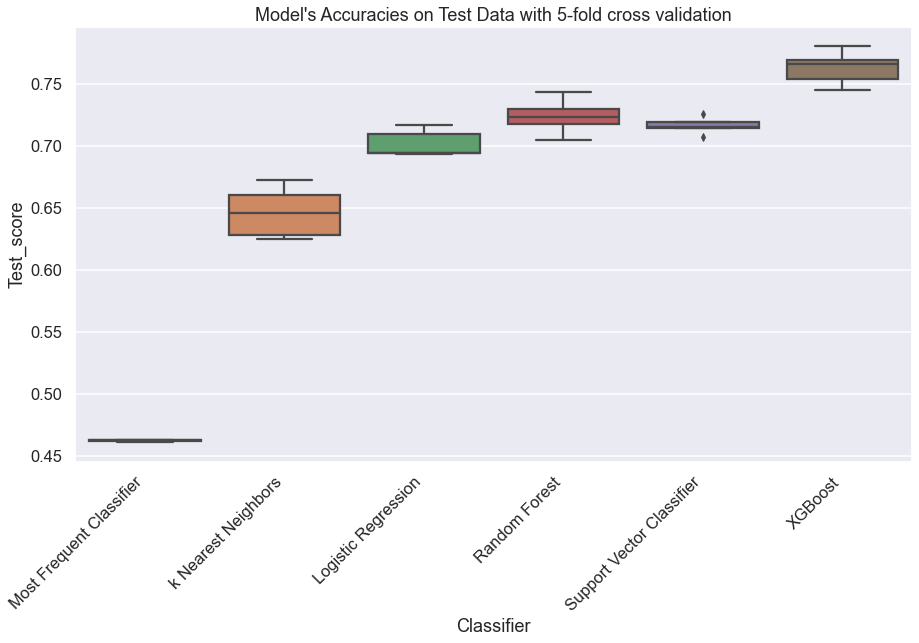

In [81]:
plt.figure(figsize=(15, 8))

sns.boxplot(df_melted.CLF,df_melted.Test_score)
#plt.yticks(np.arange(0, 1, step=0.1))
plt.xticks(rotation=45,ha='right')
#for p in ax.patches:
    #ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1))
plt.title("Model's Accuracies on Test Data with 5-fold cross validation")
plt.xlabel("Classifier")
#plt.yticks(np.arange(0,1))

In [100]:
#########################

import pickle

In [101]:
pickle.dump(svm_model_linear, open( "model.p", "wb" ) )

In [104]:
df[:1].to_json()

'{"Make_CLIMAX":{"0":0},"Make_ELMETEC":{"0":0},"Make_J&P":{"0":0},"Make_MML":{"0":0},"Make_P\\/POWER":{"0":0},"Make_PEL":{"0":0},"Make_SAMCO":{"0":0},"Make_SIEMENS":{"0":1},"Make_T\\/FAB":{"0":0},"Make_T\\/PAK":{"0":0},"Make_T\\/POWER":{"0":0},"Make_VALIDUS":{"0":0},"Make_missing":{"0":0},"Faulty_Transformer_Date_01":{"0":0},"Faulty_Transformer_Date_02":{"0":0},"Faulty_Transformer_Date_03":{"0":0},"Faulty_Transformer_Date_04":{"0":0},"Faulty_Transformer_Date_05":{"0":0},"Faulty_Transformer_Date_06":{"0":0},"Faulty_Transformer_Date_07":{"0":0},"Faulty_Transformer_Date_08":{"0":0},"Faulty_Transformer_Date_09":{"0":0},"Faulty_Transformer_Date_10":{"0":0},"Faulty_Transformer_Date_11":{"0":0},"Faulty_Transformer_Date_12":{"0":1},"Faulty_Transformer_Date_missing":{"0":0},"REGION_R1":{"0":0},"REGION_R2":{"0":0},"REGION_R3":{"0":0},"REGION_R4":{"0":1},"CLUSTER_CB":{"0":0},"CLUSTER_CD":{"0":0},"CLUSTER_CG":{"0":0},"CLUSTER_CJ":{"0":0},"CLUSTER_CK":{"0":0},"CLUSTER_CN":{"0":1},"CLUSTER_CO":{"0":

In [123]:
json_data = {"Make_CLIMAX":{"0":0},"Make_ELMETEC":{"0":0},"Make_J&P":{"0":0},"Make_MML":{"0":0},"Make_P/POWER":{"0":0},"Make_PEL":{"0":0},"Make_SAMCO":{"0":0},"Make_SIEMENS":{"0":1},"Make_T/FAB":{"0":0},"Make_T/PAK":{"0":0},"Make_T/POWER":{"0":0},"Make_VALIDUS":{"0":0},"Make_missing":{"0":0},"Faulty_Transformer_Date_01":{"0":0},"Faulty_Transformer_Date_02":{"0":0},"Faulty_Transformer_Date_03":{"0":0},"Faulty_Transformer_Date_04":{"0":0},"Faulty_Transformer_Date_05":{"0":0},"Faulty_Transformer_Date_06":{"0":0},"Faulty_Transformer_Date_07":{"0":0},"Faulty_Transformer_Date_08":{"0":0},"Faulty_Transformer_Date_09":{"0":0},"Faulty_Transformer_Date_10":{"0":0},"Faulty_Transformer_Date_11":{"0":0},"Faulty_Transformer_Date_12":{"0":1},"Faulty_Transformer_Date_missing":{"0":0},"REGION_R1":{"0":0},"REGION_R2":{"0":0},"REGION_R3":{"0":0},"REGION_R4":{"0":1},"CLUSTER_CB":{"0":0},"CLUSTER_CD":{"0":0},"CLUSTER_CG":{"0":0},"CLUSTER_CJ":{"0":0},"CLUSTER_CK":{"0":0},"CLUSTER_CN":{"0":1},"CLUSTER_CO":{"0":0},"CLUSTER_CQ":{"0":0},"CLUSTER_CS":{"0":0},"CLUSTER_CU":{"0":0},"Transformer_Repaired_By_TSW_NO":{"0":1},"Transformer_Repaired_By_TSW_SCRAPPED":{"0":0},"Transformer_Repaired_By_TSW_YES":{"0":0},"TTR_Status_3,FAULTY":{"0":0},"TTR_Status_3,OPEN":{"0":0},"TTR_Status_B,FAULTY":{"0":0},"TTR_Status_B,OPEN":{"0":0},"TTR_Status_OK":{"0":1},"TTR_Status_R,B,FAULTY":{"0":0},"TTR_Status_R,B,OPEN":{"0":0},"TTR_Status_R,FAULTY":{"0":0},"TTR_Status_R,OPEN":{"0":0},"TTR_Status_R,Y,FAULTY":{"0":0},"TTR_Status_R,Y,OPEN":{"0":0},"TTR_Status_Y,B,FAULTY":{"0":0},"TTR_Status_Y,B,OPEN":{"0":0},"TTR_Status_Y,FAULTY":{"0":0},"TTR_Status_Y,OPEN":{"0":0},"TTR_Status_nan":{"0":0},"Work_Details_Carried_Out_BLUE PHASE HT & LT CHANGED":{"0":0},"Work_Details_Carried_Out_CANABLIZED":{"0":0},"Work_Details_Carried_Out_Minor Repair":{"0":1},"Work_Details_Carried_Out_Partial Winding changed":{"0":0},"Work_Details_Carried_Out_RED PHASE HT & LT CHANGED":{"0":0},"Work_Details_Carried_Out_RYB, HT & LT CHANGED":{"0":0},"Work_Details_Carried_Out_YELLOW PHASE HT & LT CHANGED":{"0":0},"Work_Details_Carried_Out_nan":{"0":0},"Observations_Aged winding":{"0":0},"Observations_Cooling pipe damaged":{"0":0},"Observations_FDF NA (Fault cannot be determined)":{"0":0},"Observations_Low oil level":{"0":1},"Observations_Low oil level, Aged insulation":{"0":0},"Observations_Low oil level, Flashes on bushing":{"0":0},"Observations_Low oil level, Overloading":{"0":0},"Observations_Overloading":{"0":0},"Observations_Top poor":{"0":0},"Observations_Top poor, HT & LT bushings hopeless":{"0":0},"Observations_Top poor, HT & LT bushings hopeless, Low oil level":{"0":0},"Observations_Top poor, Low oil level":{"0":0},"Capacity\\n(KVA)":{"0":-1.1388403663},"Max._Allowable_Loading_Per_Phase":{"0":-1.1384252943},"RED_PHASE_LOADING":{"0":0.0592365278},"YELLOW_PHASE_LOADING":{"0":0.1021671184},"BLUE_PHASE_LOADING":{"0":0.0636705352},"Rated_Power":{"0":-1.1384252943},"Max._oil_level_(Ltr.)":{"0":-0.684388239},"Oil_Quantity":{"0":-0.985991608},"Oil_%":{"0":-0.0801064339}}

In [124]:
import requests
URL = "http://ec2-3-99-130-65.ca-central-1.compute.amazonaws.com:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [125]:
print(r.text)

[
    "Proactive Maintenance"
]

